<a href="https://colab.research.google.com/github/AurelioGuilherme/DNC_projetos/blob/main/PROJETOS_PRATICOS/PROJETO_1_DELIVERABLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROJETO 1

##CONTEXTUALIZAÇÃO

Roof Imóveis é uma das maiores empresas do ramo imobiliário Brasileiro ​

e quer expandir sua área de atuação fazendo um investimento internacional, com isso, ela contratou você, para uma consultoria estratégica.​

​

A empresa irá investir em imóveis no Condado de County, nos Estados Unidos.​

**King County - Condado de King - Washington​**

O Condado de King é um dos 39 condados do estado americano de Washington. A sede e cidade mais populosa do condado é Seattle.​

 Foi fundado em 1852. Com mais de 2,2 milhões de habitantes, de acordo com o censo nacional de 2020, é o condado mais populoso do estado e o 12º mais populoso do país. Wikipédia​

O Dataset apresenta a venda de imóveis e suas características na região de Maio de 2014 à Maio de 2015. Tem um total de 21613 registros com um total de 21 atributos. ​

# 1. Importação de bibliotecas e leitura de dados 

Para a análise utilizarei as bibliotecas Numpy, Pandas, Seaborn e Matplotlib.Pyplot, onde as duas últimas serão utilizadas para geração de gráficos que possam me auxiliar na análise.

Também foi necessário instalar a biblioteca Uszipcode, onde consigo encontrar atravez do zipcode disponível no dataframe as cidades dos imóveis.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install uszipcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 120 kB 33.5 MB/s 
     |████████████████████████████████| 76 kB 5.2 MB/s 
     |████████████████████████████████| 45 kB 3.9 MB/s 
     |████████████████████████████████| 41 kB 395 kB/s 


Li o arquivo csv com a biblioteca pandas e atribui meu dataframe como df.

In [ ]:
df = pd.read_csv('/content/kc_house_data.csv')

# 2. Leitura do data frame e analise primaria

##2.1 SOBRE OS DADOS


O dataframe possui 21 colunas:

COLUNA *** DESCRIÇÃO


id​ = Identificador único do imóvel​

date​ = Data da Venda​

price​ = Preço de venda​

bedrooms​ = Nº de Quartos​

bathrooms​ = Nº de Banheiros​

sqft_liv​ = Tamanho de área habitável em ft²​

sqft_lot​ = Tamanho do terreno em ft²​

floors​ = Número de andares​

waterfront​ = Indicativo se o imóvel é a beira-mar​

view​ = Grau de quão belo é a vista do imóvel (0 a 4)​

condition​ = Condição da casa (1 a 5)​

grade​ = Classificação por qualidade de material utilizado na construção​

sqft_above​ = Área em acima do solo em ft²​

sqft_basmt​ = Área em abaixo do solo em ft²​

yr_built​ = Ano de construção​

yr_renov​ = Ano de restauração, caso o contrário, 0.​

zipcode​ = Zip Code 5 - Similar ao CEP​

lat​ = Latitude​

long​ = Longitude​

squft_liv15​ = Média da área habitável dos 15 imóveis mais próximos, em ft²​

squft_lot15​ = Média da área do lote dos 15 imóveis mais próximos, em ft²​





In [ ]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


A primeira vista, já é possivel analisar que possui 21613 linhas, e algumas colunas estão com formatos incompatíveis com seus dados, por exemplo a coluna date.

##2.2 Analise primária(data frame sem nenhum tratamento)

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Analisando os valores mínimos é possivel identificar que possui imóveis com 0 quartos e 0 banheiros, possivelmente são valores outliers que devem ser removidos.


In [ ]:
df.min()

id                       1000102
date             20140502T000000
price                    75000.0
bedrooms                       0
bathrooms                    0.0
sqft_living                  290
sqft_lot                     520
floors                       1.0
waterfront                     0
view                           0
condition                      1
grade                          1
sqft_above                   290
sqft_basement                  0
yr_built                    1900
yr_renovated                   0
zipcode                    98001
lat                      47.1559
long                    -122.519
sqft_living15                399
sqft_lot15                   651
dtype: object

Já analisando os valores maximos, é possivel que existe outro valor outlier, pois há um imóvel com 33 quartos.

In [ ]:
df.max()

id                    9900000190
date             20150527T000000
price                  7700000.0
bedrooms                      33
bathrooms                    8.0
sqft_living                13540
sqft_lot                 1651359
floors                       3.5
waterfront                     1
view                           4
condition                      5
grade                         13
sqft_above                  9410
sqft_basement               4820
yr_built                    2015
yr_renovated                2015
zipcode                    98199
lat                      47.7776
long                    -121.315
sqft_living15               6210
sqft_lot15                871200
dtype: object

In [ ]:
df[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


O data frame não possui valores nulos

In [ ]:
print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  


* É possivel analisar que o dataframe não possui as cidades dos imóveis, mas sim latitude, longitude e codigo postal dos mesmos, portanto é necessario fazer essa conversão para identificar mais precisamente os locaís dos imóveis.
* As colunas correspondentes aos banheiros e andares embora esteja em valor float, não tem divergência pois é um padrão americano para esse tipo de formatação, onde, em banheiros, 0,25 corresponde a um item do banheiro, referente à pia, vazo, choveiro e banheira, ou seja uma casa com 1.0 banheiro é uma casa com um banheiro completo. Já em relação aos andares os valores decimais correspodem se o imovel possui sotão ou porão. Portanto não é necessario tratamento para essas colunas


# 3. Cidades dos imoveis

Para conseguir as cidades dos imóveis encontrei um artigo em: https://www.pythonpool.com/uszipcode-python/

documentação: https://uszipcode.readthedocs.io/index.html
 

A princípio criei uma coluna no dataframe com o nome city, e com a biblioteca Uszipcode iterei com um loop for o zipcode do dataframe, assim consegui a localização dos imóveis.


In [ ]:
df['city'] = ' '  # criei a coluna 'city' com valores em branco
from uszipcode import SearchEngine    #importei SearchEngine da biblioteca uszipcode
engine = SearchEngine()   
for index, row in df.iterrows():    # utilizei um loop for para iterar com a coluna city
  zipcode = engine.by_zipcode(df['zipcode'][index])   
  df['city'][index] = zipcode.major_city    # atribui os valores das cidades no dataframe


/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df[['city']].head()

,city
0,Seattle
1,Seattle
2,Kenmore
3,Seattle
4,Sammamish


Após conseguir as cidades dos imóveis, decidi excluir do dataframe as informações referente a localização, (latitude,longitude e zipcode), para diminuir o consumo de memória e também por não serem mais relevantes para a análise.

In [ ]:
df.drop(columns=['zipcode','lat','long'],inplace=True)

In [ ]:
df[['city']].value_counts()

city         
Seattle          8977
Renton           1597
Bellevue         1407
Kent             1203
Redmond           979
Kirkland          977
Auburn            912
Sammamish         800
Federal Way       779
Issaquah          733
Maple Valley      590
Woodinville       471
Snoqualmie        310
Kenmore           283
Mercer Island     282
Enumclaw          234
North Bend        221
Bothell           195
Duvall            190
Carnation         124
Vashon            118
Black Diamond     100
Fall City          81
Medina             50
dtype: int64

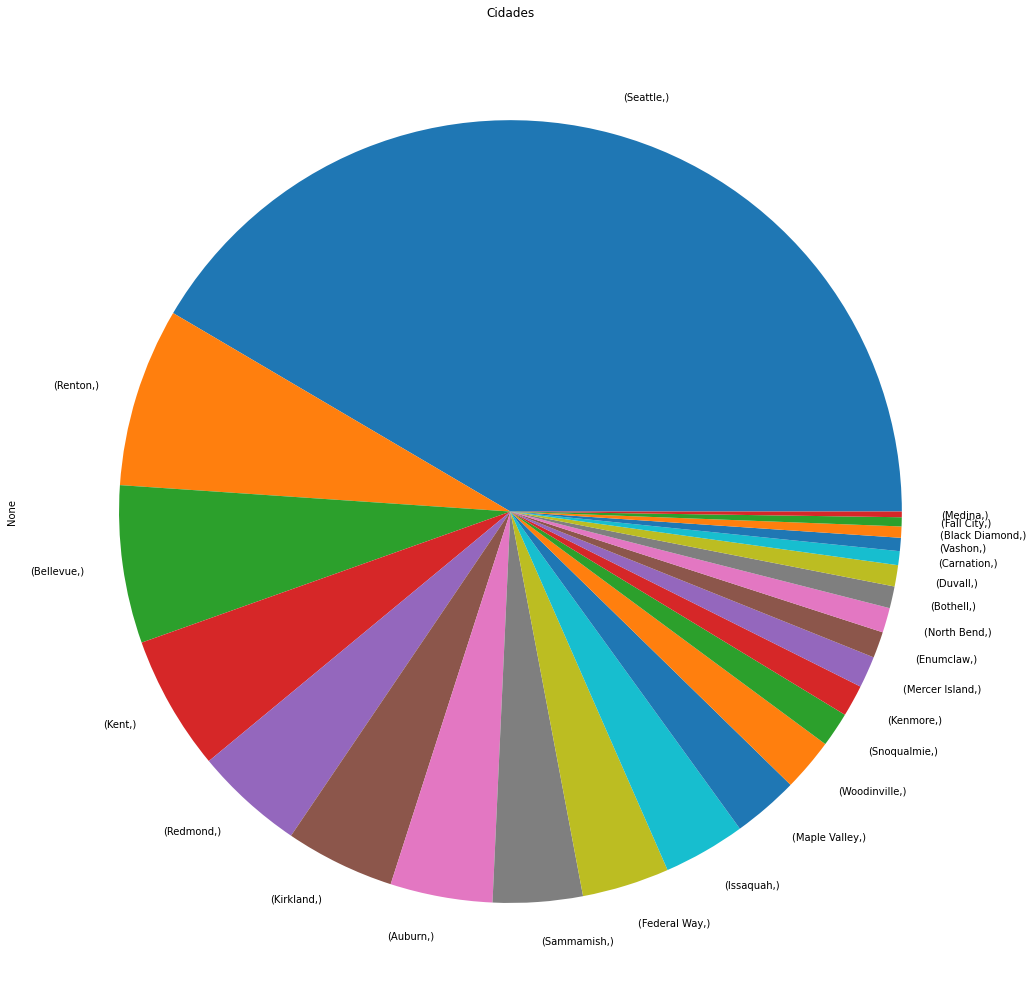

In [ ]:
df[['city']].value_counts().plot(figsize=(18,18),kind='pie', title = 'Cidades');

Já é possivel concluir que a cidade em que houve mais vendas de imóveis foi Seattle, e a com menos venda foi Medina (Whashington).

#4. Tratamento de datas

Como a coluna de data esta é do tipo string, decidi cortar parte desnecessária deixando somente o ano, e também converti o tipo do dado para um valor números inteiros para facilitar nas comparações com outras colunas que já estão neste formato.

https://towardsdatascience.com/working-with-datetime-in-pandas-dataframe-663f7af6c587

In [ ]:
df[['date']].head()

,date
0,20141013T000000
1,20141209T000000
2,20150225T000000
3,20141209T000000
4,20150218T000000


In [ ]:
df['date'].str.slice(0,4)
df['date'] = df['date'].str.slice(0,4).astype(int)

df[['date']].head()

,date
0,2014
1,2014
2,2015
3,2014
4,2015


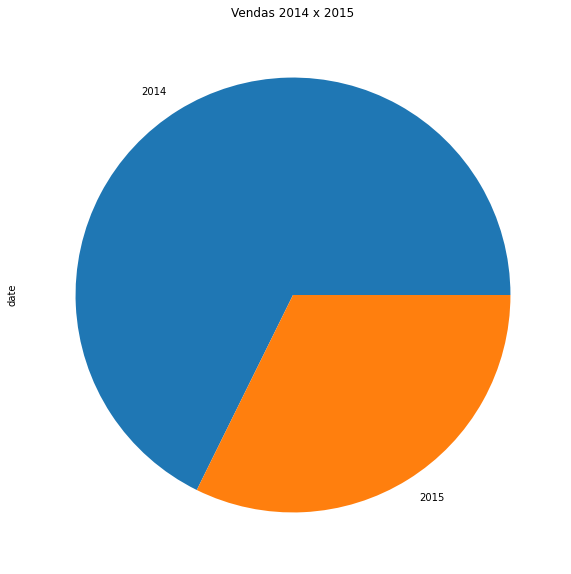

In [ ]:
plt.figure(figsize=(10,10))
df['date'].value_counts().plot(kind = 'pie', title = 'Vendas 2014 x 2015');

Porem para avaliar quais os melhores imóveis, os dados referente as datas, em um espaço de tempo tão curto, não são necessarios, portanto decidi por remove-los


In [ ]:
df.drop(columns=['date'],inplace=True)

#5. Preço por pés dos imóveis

Para conseguir o preço por pés dividi a coluna correspondente aos preço de venda do imovóvel por  área construida.

Atribui esses valores a uma nova coluna: 'price/sqft_living'

In [ ]:
df['price/sqft_living'] = df['price']/df['sqft_living']

In [ ]:
df['price/sqft_lot'] = df['price']/df['sqft_lot']

In [ ]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,city,price/sqft_living,price/sqft_lot
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,Seattle,188.050847,39.274336
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,Seattle,209.338521,74.288870
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,Kenmore,233.766234,18.000000
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,Seattle,308.163265,120.800000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,Sammamish,303.571429,63.118812


# 6. Tratamento de dados Outliers primários

Filtrando as colunas correspondentes a quartos e banheiros com valores igual a 0, removi-os do dataframe pois considero-os valores inconsistentes.

Também removi o imóvel com 33 quartos pelo mesmo motivo.

In [ ]:
df[(df['bedrooms'] == 0) | (df['bathrooms'] == 0) | (df['floors'] == 0) | (df['bedrooms'] == 33)]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,city,price/sqft_living,price/sqft_lot
875,6306400140,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,2360,4000,Seattle,357.375979,229.848866
1149,3421079032,75000.0,1,0.00,670,43377,1.0,0,0,3,3,670,0,1966,0,1160,42882,Enumclaw,111.940299,1.729027
3119,3918400017,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,1470,1399,Seattle,258.503401,388.151175
3467,1453602309,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,1430,1650,Seattle,201.398601,174.545455
4868,6896300380,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,2170,6000,Seattle,584.615385,38.644068
5832,5702500050,280000.0,1,0.00,600,24501,1.0,0,0,2,3,600,0,1950,0,990,22549,North Bend,466.666667,11.428105
6994,2954400190,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,4740,35061,Redmond,269.365904,46.259997
8477,2569500210,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,2500,8751,Kent,148.449782,40.864287
8484,2310060040,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,1810,5685,Maple Valley,132.596685,42.335509
9773,3374500520,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,2520,8050,Kent,144.308943,44.104858


Utilizei a função drop usando os filtros.

In [ ]:
df.drop(df[(df['bedrooms'] == 0) | (df['bathrooms'] == 0) | (df['bedrooms'] == 33)].index,axis=0,inplace = True)

Porem ainda existem dados outliers, que tratarei futuramente de acordo com a cidade do imóvel.

#7. Melhores imóveis.

Para identificar os melhores imóveis utilizarei filtros em que possa-se identificar uma discrepancia na quantidade de vendas.

Então copiei meu dataframe principal para outro dataframe com o nome de melhores_Imoveis, onde nele removerei imóveis sem afetar meu dataframe principal.

In [ ]:
melhores_Imoveis = df.copy()

In [ ]:
melhores_Imoveis.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,city,price/sqft_living,price/sqft_lot
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,Seattle,188.050847,39.274336
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,Seattle,209.338521,74.288870
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,Kenmore,233.766234,18.000000
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,Seattle,308.163265,120.800000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,Sammamish,303.571429,63.118812


Iniciando a análise pelas condições dos imóveis vendidos, destaca-se uma quantidade muito menor dos imóveis com condição inferior a 3.

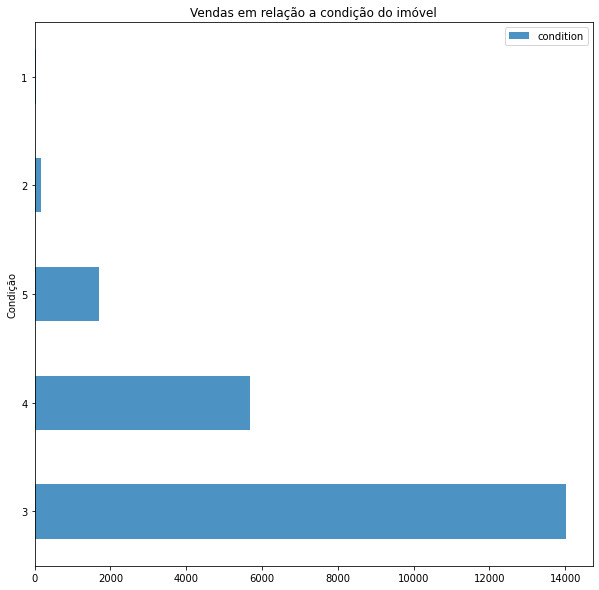

In [ ]:
plt.figure(figsize=(10,10))
melhores_Imoveis['condition'].value_counts().plot(title = 'Vendas em relação a condição do imóvel',kind='barh',xlabel = 'Condição',legend = 'Condição',align='center', alpha=.8);

Decidi então por remover os imóveis em condição inferior a 3, tendo em vista que necessitão de reformas prejudicando assim a rentabilidade, e  também possivelmente aumentando a complexidade desta expansão da aréa de investimento da Roof Imóveis

In [ ]:
df[(df['condition'] < 3)]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,city,price/sqft_living,price/sqft_lot
36,9435300030,550000.0,4,1.0,1660,34848,1.0,0,0,1,5,930,730,1933,0,2160,11467,Redmond,331.325301,15.782828
38,7895500070,240000.0,4,1.0,1220,8075,1.0,0,0,2,7,890,330,1969,0,1290,7800,Auburn,196.721311,29.721362
242,1868901275,455000.0,2,1.0,1430,5000,1.5,0,0,2,7,1430,0,1925,0,1450,3750,Seattle,318.181818,91.000000
328,1665400045,186375.0,3,1.0,1000,7636,1.0,0,0,2,7,1000,0,1952,0,1150,7600,Seattle,186.375000,24.407412
380,1726059053,270000.0,2,1.5,1380,209959,1.0,0,0,1,6,1380,0,1954,0,3130,19868,Bothell,195.652174,1.285965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19299,7883606725,174900.0,3,1.0,1100,6000,1.5,0,0,2,6,1100,0,1926,0,960,5880,Seattle,159.000000,29.150000
19363,9485920120,290000.0,4,2.5,2340,52272,2.0,0,0,2,8,2340,0,1978,0,2480,40500,Kent,123.931624,5.547903
19448,2023059052,450000.0,3,1.0,1350,92721,1.0,0,0,2,6,1200,150,1946,0,1860,8096,Renton,333.333333,4.853269
19512,2023049361,246500.0,2,1.0,940,6000,1.0,0,0,2,7,940,0,1954,0,1890,8547,Seattle,262.234043,41.083333


In [ ]:
melhores_Imoveis.drop(melhores_Imoveis[(melhores_Imoveis['condition'] < 3)].index,axis=0, inplace = True)

## 7.1 Ano de construção/ restauração.

Então decidi verificar a quantidade de vendas de acordo com o ano de contrução do imóvel. Para isso filtrei os imoveis contruidos antes de 1960 utilizando a função query como filtro, assim encontrei os imóveis com essas características.

In [ ]:
melhores_Imoveis.query('yr_built < 1960 & yr_renovated < 1960')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,city,price/sqft_living,price/sqft_lot
0,7129300520,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,Seattle,188.050847,39.274336
2,5631500400,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,Kenmore,233.766234,18.000000
11,9212900260,468000.0,2,1.0,1160,6000,1.0,0,0,4,7,860,300,1942,0,1330,6000,Seattle,403.448276,78.000000
12,114101516,310000.0,3,1.0,1430,19901,1.5,0,0,4,7,1430,0,1927,0,1780,12697,Kenmore,216.783217,15.577107
14,1175000570,530000.0,5,2.0,1810,4850,1.5,0,0,3,7,1810,0,1900,0,1360,4850,Seattle,292.817680,109.278351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21303,522059130,465000.0,3,1.0,1150,18200,1.0,0,0,5,7,1150,0,1959,0,1714,18200,Renton,404.347826,25.549451
21332,9266700190,245000.0,1,1.0,390,2000,1.0,0,0,4,6,390,0,1920,0,1340,5100,Seattle,628.205128,122.500000
21343,2924079034,332220.0,3,1.5,2580,47480,1.0,0,0,3,7,1360,1220,1953,0,1760,48181,Fall City,128.767442,6.997051
21470,121039156,249000.0,3,1.0,1030,24750,1.0,0,2,3,5,1030,0,1943,0,2810,28800,Federal Way,241.747573,10.060606


In [ ]:
melhores_Imoveis.query('yr_built > 1960 | yr_renovated > 1960')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,city,price/sqft_living,price/sqft_lot
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,Seattle,209.338521,74.288870
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,Seattle,308.163265,120.800000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,Sammamish,303.571429,63.118812
5,7237550310,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,4760,101930,Redmond,226.014760,12.018052
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,2238,6819,Federal Way,150.145773,37.762135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,Seattle,235.294118,318.302387
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200,Seattle,173.160173,68.811285
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007,Seattle,394.216667,297.852593
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287,Issaquah,250.000000,167.504188


Com isso identifiquei que houve 16.20% a mais de vendas de imóveis contruidos após 1975 e/ou reformados após este ano.



In [ ]:
imoveis_Antigos = len(melhores_Imoveis.query('yr_built < 1960 & yr_renovated < 1960'))  # defini a quantidade dos imóveis contruidos antes de 1975 e sem nenhuma restauçaão a uma variavel.
imoveis_Novos = len(melhores_Imoveis.query('yr_built > 1960 | yr_renovated > 1960'))  # defini a quantidade dos imóveis contruidos após 1975 ou restaurados a uma variavel.
lista = [imoveis_Antigos,imoveis_Novos]  # atribui os valores a uma lista para geração do gráfico.
lista

[6547, 14609]

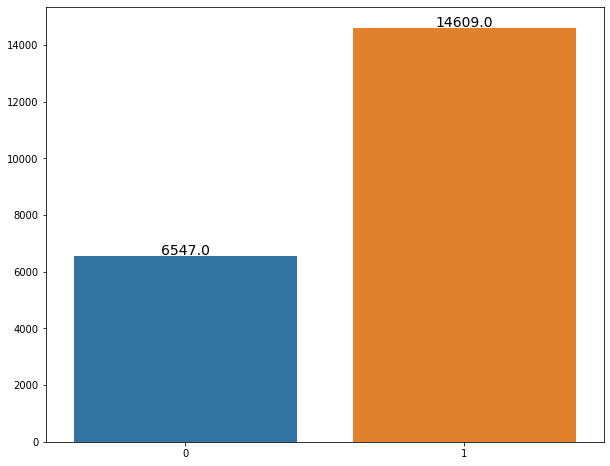

In [ ]:
plt.figure(figsize=(10,8))


plot = sns.barplot(x=np.arange(len(lista)), y=lista)  # plotei o gráfico com a biblioteca seaborn
for i in plot.patches:   # utilizei um loop for para poder plotar os valoes conrespondentes de cada barra
    plot.annotate(i.get_height(), # identifica a altura da barra
                  (i.get_x() + i.get_width() / 2, i.get_height()), #identifica os eixos x das barras e o tamanho do eixo x, e divide por 2 para encontrar o meio da barra.
                  ha='center',  # centraliza o texto.
                  va='baseline', # ajusta a altura 
                  fontsize=14,  # define o tamanho da fonte
                  color='black',    # define a cor do texto.
                  xytext=(0, 1),  #atribui o valor do texto
                  textcoords='offset points')   # atribui a cordenada do texto.
    


Decidí então por remover os imóveis que foram construidos antes de 1975 e não foram restaurados, poís alem de terem um porcentagem de vendas maior, é um fator  que é considerado na revenda de um imóvel.

In [ ]:
melhores_Imoveis.drop(melhores_Imoveis[(melhores_Imoveis['yr_built'] < 1960) &  (melhores_Imoveis['yr_renovated'] < 1960)].index,axis=0, inplace = True)

In [ ]:
melhores_Imoveis

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,city,price/sqft_living,price/sqft_lot
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,Seattle,209.338521,74.288870
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,Seattle,308.163265,120.800000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,Sammamish,303.571429,63.118812
5,7237550310,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,4760,101930,Redmond,226.014760,12.018052
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,2238,6819,Federal Way,150.145773,37.762135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,Seattle,235.294118,318.302387
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200,Seattle,173.160173,68.811285
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007,Seattle,394.216667,297.852593
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287,Issaquah,250.000000,167.504188


## 7.2 Quantidade de vendas por cidade.

Verificando a despropocionalidade na quantidade de vendas das cidades, decidi basear minha análise na cidade em que ocorreu maior numero de vendas.

In [ ]:
melhores_Imoveis['city'].value_counts()

Seattle          3619
Renton           1319
Kent             1102
Bellevue         1078
Redmond           961
Kirkland          891
Sammamish         790
Auburn            779
Federal Way       712
Issaquah          705
Maple Valley      578
Woodinville       458
Snoqualmie        283
Mercer Island     239
Kenmore           217
North Bend        201
Duvall            181
Bothell           179
Enumclaw          176
Carnation         107
Black Diamond      91
Vashon             84
Fall City          63
Medina             37
Name: city, dtype: int64

 Como Seattle é a principal cidade do condado King, decidirei os 5 melhores imóveis nesta cidade, pois com o dataframe é possivel identificar a discrepancia da quantidade de vendas em relação as outras cidades, então a revenda de um imóvel seria muito mais rápida do que se optar por outra cidade.

###7.3.1. Seatlle

Atribui outro dataframe somente com os imoveis de Seattle.
e verifiquei a media dos valores de venda dos imoveis.

In [ ]:
seattle_Imoveis = melhores_Imoveis[(melhores_Imoveis['city'] == 'Seattle')].copy()
seattle_Imoveis['price'].mean()

562235.4155844155

In [ ]:
seattle_Imoveis

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,city,price/sqft_living,price/sqft_lot
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,Seattle,209.338521,74.288870
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,Seattle,308.163265,120.800000
7,2008000270,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,1650,9711,Seattle,275.330189,30.053548
8,2414600126,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,1780,8113,Seattle,128.932584,30.722892
15,9297300055,650000.0,4,3.00,2950,5000,2.0,0,3,3,9,1980,970,1979,0,2140,4000,Seattle,220.338983,130.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21607,2997800021,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,1330,1265,Seattle,362.595420,367.078825
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,Seattle,235.294118,318.302387
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200,Seattle,173.160173,68.811285
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007,Seattle,394.216667,297.852593


A média do valor dos imóveis devem ser calculadas de acordo com a cidade, pois a cidade do imóvel intefere no valor do imóvel.

In [ ]:
seattle_Imoveis['price_Mean'] = ' ' # criei a coluna media de preços vazia.

In [ ]:
seattle_Imoveis['price_Mean'] = seattle_Imoveis['price'].mean()  #atribui a media do valor do imóvel a coluna 'price_Mean'

###7.3.2 Removendo outliers

Criei uma função para identificar os valores outliers (valore de 1.5x (+/-) a diferença de amplitude antiquartil) , apos identifica-los removi-os os valores usando um filtro



In [ ]:
def outlier(x):
  ''' A função retornara o valores considerado outliers inferior e superior
    x = valor que deseja descobrir
    quartil_75 = retorna o quartil 75%
    quartil_25 = retorna o quartil 25%
    outlier é a diferença de 1,5 vezes a diferença do amplitude
    interquantil
    C = constante
      ''' 
  quartil_75 = np.quantile(x,0.75)
  quartil_25 = np.quantile(x,0.25)
  c = 1.5
  intervalo_Interquartil =  quartil_75 - quartil_25
  outlier_Sup = quartil_75 + (c * intervalo_Interquartil)
  outlier_Inf = quartil_25 - (c * intervalo_Interquartil)
  return outlier_Inf,outlier_Sup
  

In [ ]:
outlier(seattle_Imoveis['price'])

(-94300.0, 1096500.0)

In [ ]:
seattle_Imoveis.drop(seattle_Imoveis[(seattle_Imoveis['price'] > 1096500) | (seattle_Imoveis['price'] < -94300)].index,axis=0,inplace = True)

In [ ]:
outlier(seattle_Imoveis['sqft_living'])

(15.0, 3655.0)

In [ ]:
seattle_Imoveis.drop(seattle_Imoveis[(seattle_Imoveis['sqft_living'] > 3655) | (seattle_Imoveis['sqft_living'] < 15)].index,axis=0,inplace = True)

In [ ]:
outlier(seattle_Imoveis['sqft_lot'])

(-7473.625, 16647.375)

In [ ]:
seattle_Imoveis.drop(seattle_Imoveis[(seattle_Imoveis['sqft_lot'] > 16647.375) | (seattle_Imoveis['sqft_lot'] < -7473.625)].index,axis=0,inplace = True)

### 7.3.3. Os 5 melhores imóveis de Seattle

Os melhores imóveis com relação aos seguintes itens:

* Cidade com maior numero de vendas (Seattle)
* Condição igual ou seperior a 3
* Contruidos/restaurados após 1960


In [ ]:
seattle_Imoveis.sort_values('price/sqft_living')[['id','price','bedrooms','bathrooms','floors','condition','grade','yr_built','city','price/sqft_living','price/sqft_lot']].head()

,id,price,bedrooms,bathrooms,floors,condition,grade,yr_built,city,price/sqft_living,price/sqft_lot
8200,5379804470,170000.0,4,1.00,1.0,4,7,1966,Seattle,88.541667,12.330456
12185,7686202065,170000.0,4,1.75,1.0,4,7,1962,Seattle,88.541667,22.666667
21186,7896300592,303500.0,6,4.50,2.0,3,8,2007,Seattle,89.528024,42.152778
15568,2560801222,180000.0,3,2.25,2.0,3,7,1967,Seattle,90.452261,28.346457
3540,1823049202,175000.0,6,1.50,1.0,3,7,1971,Seattle,90.673575,20.833333


# 8 Imóveis vendidos mais de uma vez


Embora tenha conseguido identificar os dados referente aos imóveis vendidos mais de uma vez, não consegui identificar a lucratividade.

In [ ]:
lucratividade = df[df['id'].duplicated()]


In [ ]:
lucratividade

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,city,price/sqft_living,price/sqft_lot
94,6021501535,700000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,1570,4500,Seattle,443.037975,140.000000
314,4139480200,1400000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,3860,11244,Bellevue,326.340326,115.673800
325,7520000520,240500.0,2,1.00,1240,12092,1.0,0,0,3,6,960,280,1922,1984,1820,7460,Seattle,193.951613,19.889183
346,3969300030,239900.0,4,1.00,1000,7134,1.0,0,0,3,6,1000,0,1943,0,1020,7138,Seattle,239.900000,33.627698
372,2231500030,530000.0,4,2.25,2180,10754,1.0,0,0,5,7,1100,1080,1954,0,1810,6929,Seattle,243.119266,49.283987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181,7853400250,645000.0,4,3.50,2910,5260,2.0,0,0,3,9,2910,0,2012,0,2910,5260,Snoqualmie,221.649485,122.623574
20613,2724049222,220000.0,2,2.50,1000,1092,2.0,0,0,3,7,990,10,2004,0,1330,1466,Seattle,220.000000,201.465201
20670,8564860270,502000.0,4,2.50,2680,5539,2.0,0,0,3,8,2680,0,2013,0,2680,5992,North Bend,187.313433,90.630078
20780,6300000226,380000.0,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,1130,1598,Seattle,316.666667,175.034546


# 9 piores imoveis
        

Como Medina é a cidade com menor numero de vendas de imóveis entre os dados,  ela é a pior cidade para se investir no mercado imobiliario

In [ ]:
medina_Imoveis = df[(df['city'] == 'Medina')].copy()

In [ ]:
medina_Imoveis.sort_values('price')[['id','price','bedrooms','bathrooms','floors','condition','grade','yr_built','city','price/sqft_living','price/sqft_lot']].tail()

,id,price,bedrooms,bathrooms,floors,condition,grade,yr_built,city,price/sqft_living,price/sqft_lot
15255,2425049063,3640900.0,4,3.25,2.0,4,11,1990,Medina,753.809524,163.584490
16302,7397300170,3710000.0,4,3.50,2.0,4,12,2000,Medina,668.468468,132.131918
4149,6447300265,4000000.0,4,5.50,2.0,3,12,2008,Medina,564.971751,241.356423
4411,2470100110,5570000.0,5,5.75,2.0,3,13,2001,Medina,605.434783,158.829736
9254,9208900037,6885000.0,6,7.75,2.0,3,13,2001,Medina,696.157735,219.449225
